In [1]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


#Копула Фреше
MEAN = [0, 2]
COV = [[1,0],[1,2]]
N = sps.multivariate_normal(MEAN,COV)

x,y = np.meshgrid(np.linspace(-10,10,20), np.linspace(-10,10,20))

x = x.ravel()
y = y.ravel()
X = [(x,y) for x,y in zip(x,y)]


N1 = [ sum([N.cdf((_x,_y)) for _y in y]) for _x in x]
N2 = [ sum([N.cdf((_x,_y)) for _x in x]) for _y in y]

In [2]:
@np.vectorize
def W(x,y):
  return max(x+y-1,0)

@np.vectorize
def M(x,y):
  return min(x,y)

@np.vectorize
def P(x,y):
  return x*y

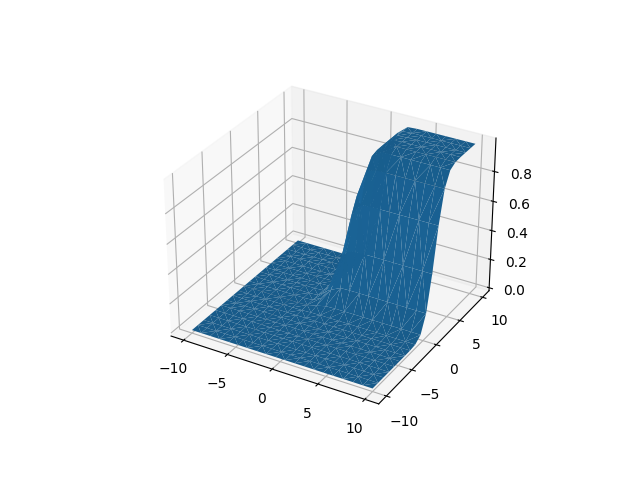

In [3]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot_trisurf(x,y, N.cdf(X))
plt.show()

In [4]:
ALFA = 0.7
BETA = 0.2

@np.vectorize
def CopulaFerche(u,v):
    return ALFA*M(u,v)+(1-ALFA-BETA)*P(u,v) + BETA*W(u,v)



400


C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_6608\2416133844.py:15: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax1.tricontourf(x, y, z, zdir='z',cmap=cm.jet)


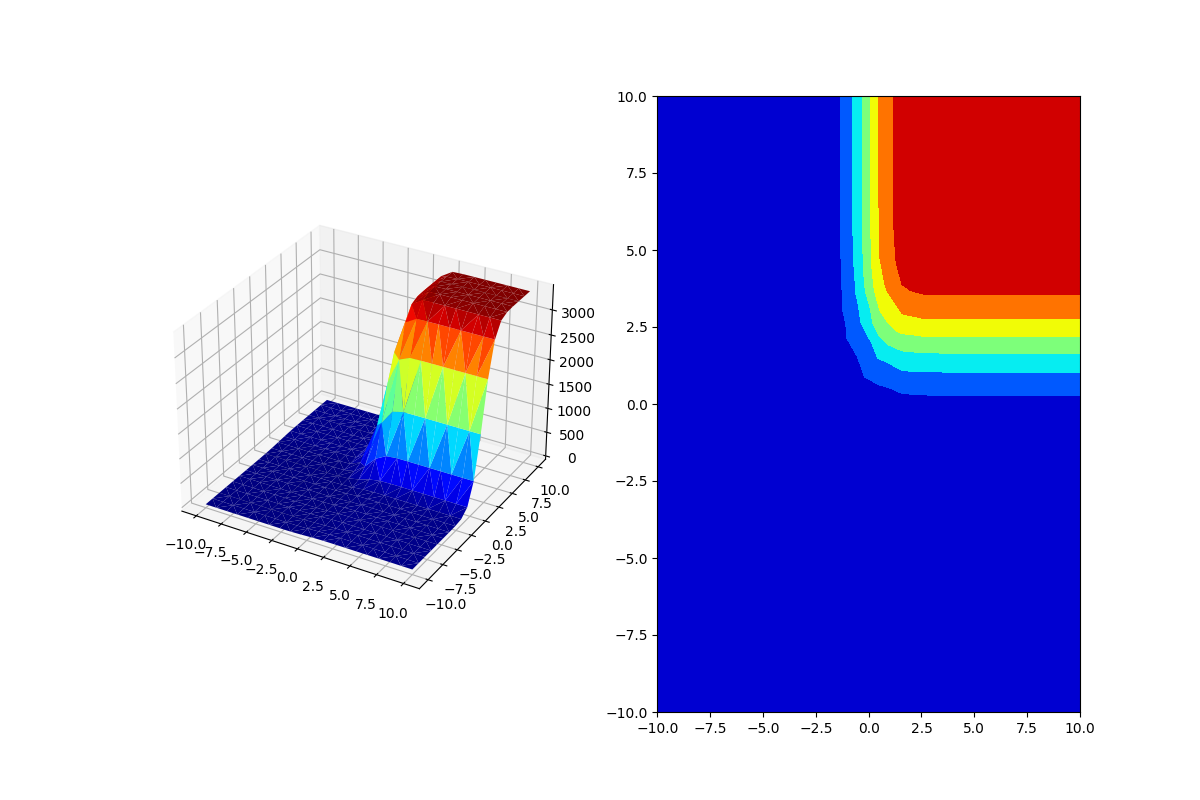

In [5]:
%matplotlib widget

ALFA = 0.7
BETA = 0.2


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121,projection="3d")
z = CopulaFerche(N1,N2)
print(len(z))

polyc = ax.plot_trisurf(x, y, z,cmap=cm.jet)

ax1 = fig.add_subplot(122)
ax1.tricontourf(x, y, z, zdir='z',cmap=cm.jet)

plt.show()



400


C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_6608\761009237.py:14: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax1.tricontourf(x, y, z, zdir='z',cmap=cm.jet)


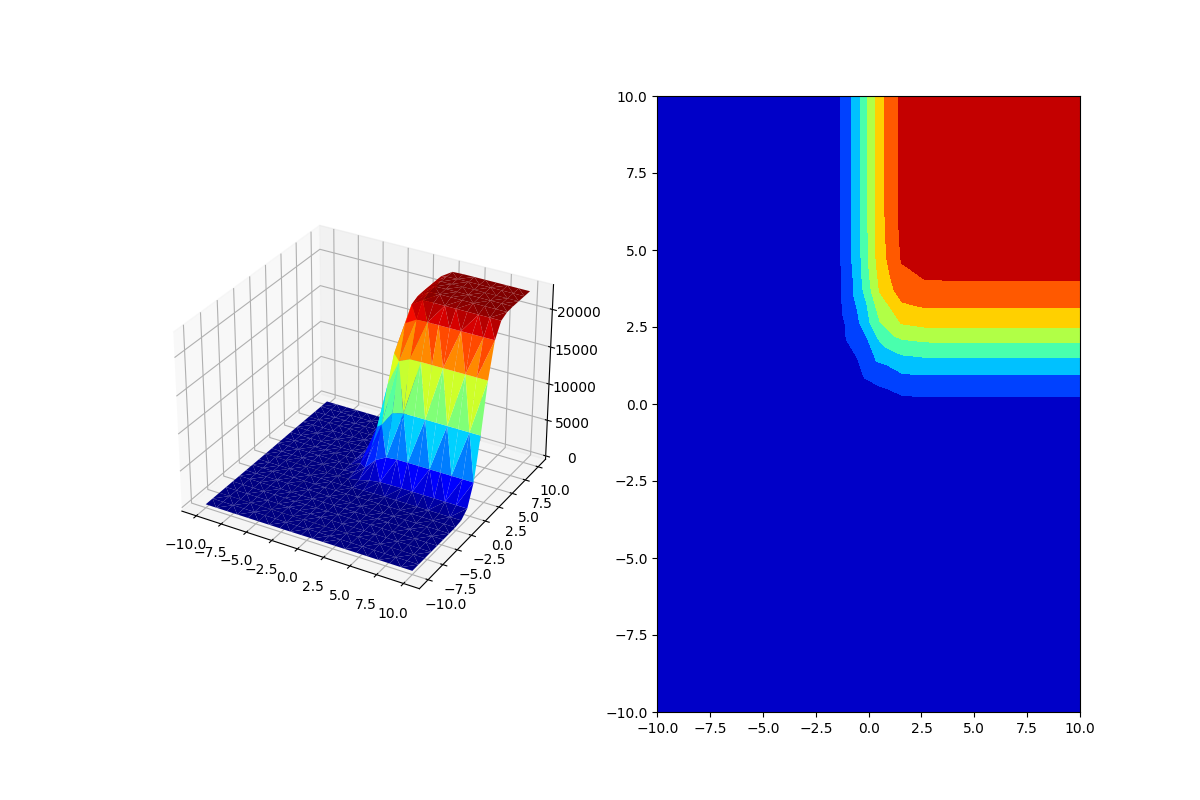

In [6]:
%matplotlib widget

ALFA = 0.1
BETA = 0.2

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121,projection="3d")
z = CopulaFerche(N1,N2)
print(len(z))

polyc = ax.plot_trisurf(x, y, z,cmap=cm.jet)

ax1 = fig.add_subplot(122)
ax1.tricontourf(x, y, z, zdir='z',cmap=cm.jet)

plt.show()

400


C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_6608\1120568630.py:15: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax1.tricontourf(x, y, z, zdir='z',cmap=cm.jet)


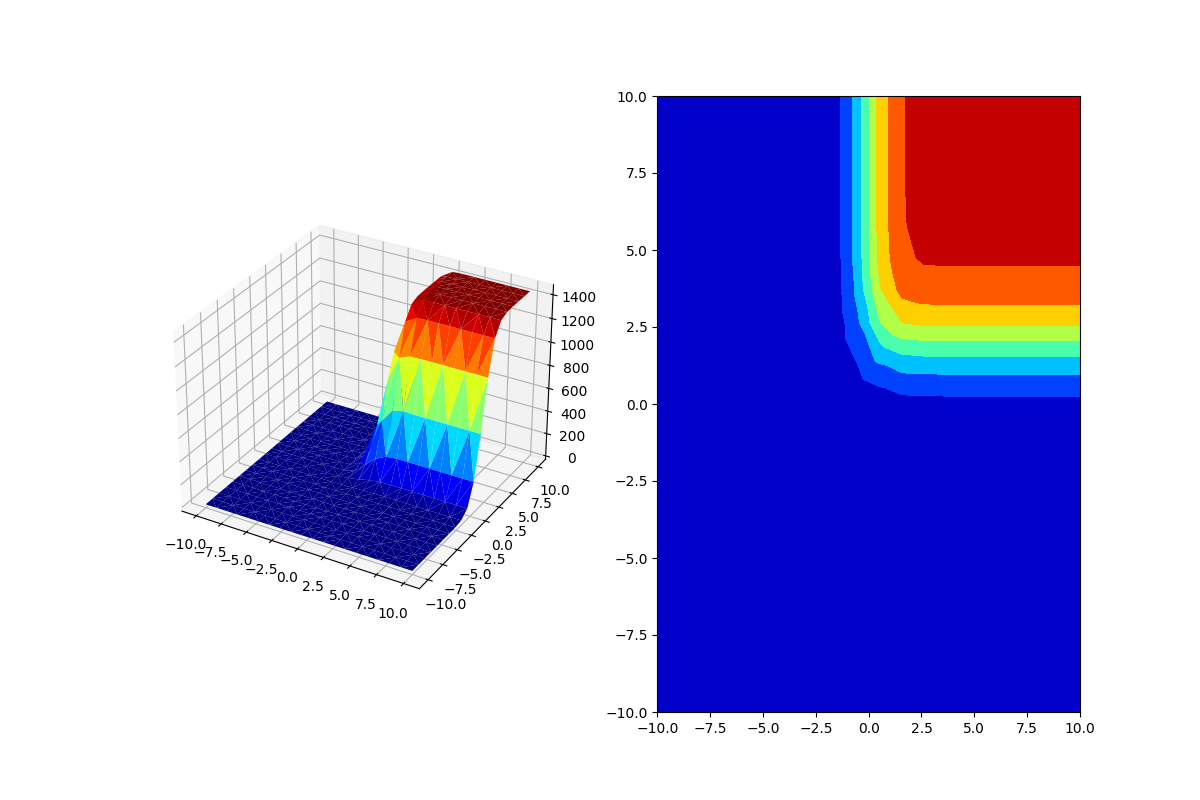

In [7]:
%matplotlib widget

ALFA = 0.95
BETA = 0.01


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121,projection="3d")
z = CopulaFerche(N1,N2)
print(len(z))

polyc = ax.plot_trisurf(x, y, z,cmap=cm.jet)

ax1 = fig.add_subplot(122)
ax1.tricontourf(x, y, z, zdir='z',cmap=cm.jet)

plt.show()

400


C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_6608\2082973886.py:13: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax1.tricontourf(x, y, z, zdir='z',cmap=cm.jet)


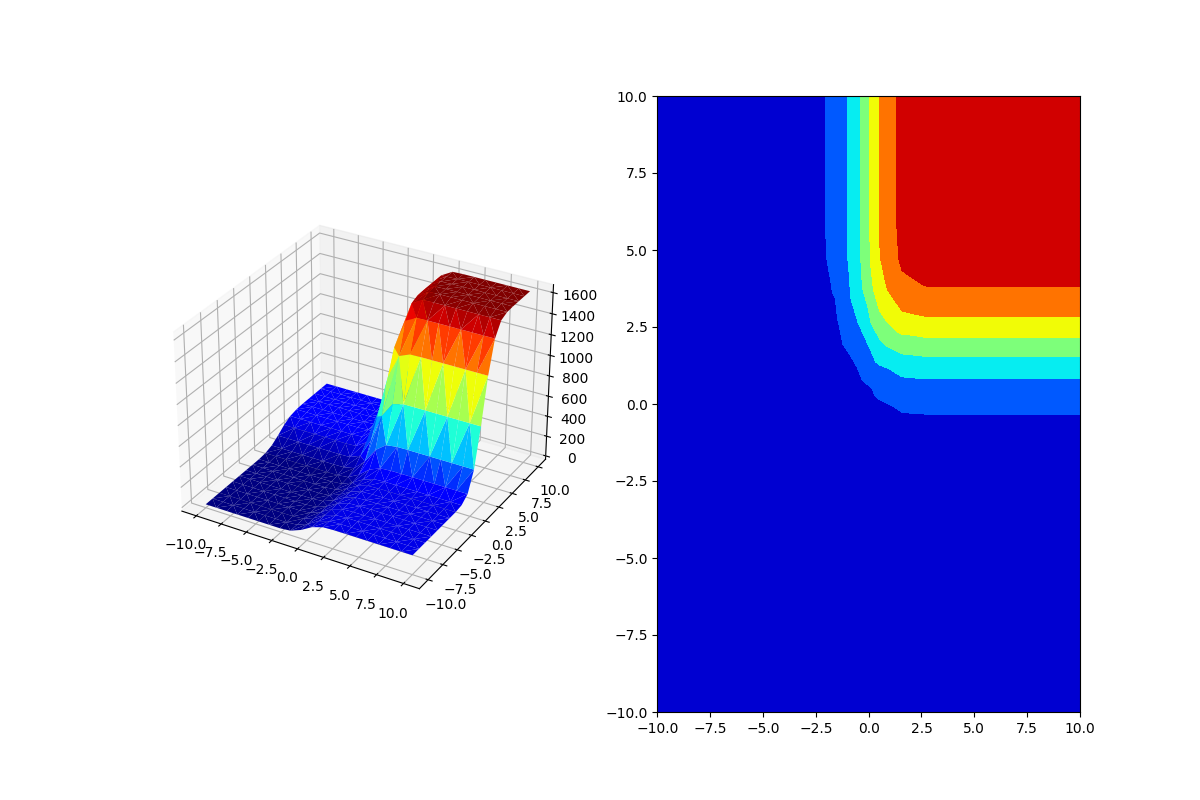

In [8]:
ALFA = 0.01
BETA = 0.95


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121,projection="3d")
z = CopulaFerche(N1,N2)
print(len(z))

polyc = ax.plot_trisurf(x, y, z,cmap=cm.jet)

ax1 = fig.add_subplot(122)
ax1.tricontourf(x, y, z, zdir='z',cmap=cm.jet)

plt.show()

400


C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_6608\2082973886.py:13: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax1.tricontourf(x, y, z, zdir='z',cmap=cm.jet)


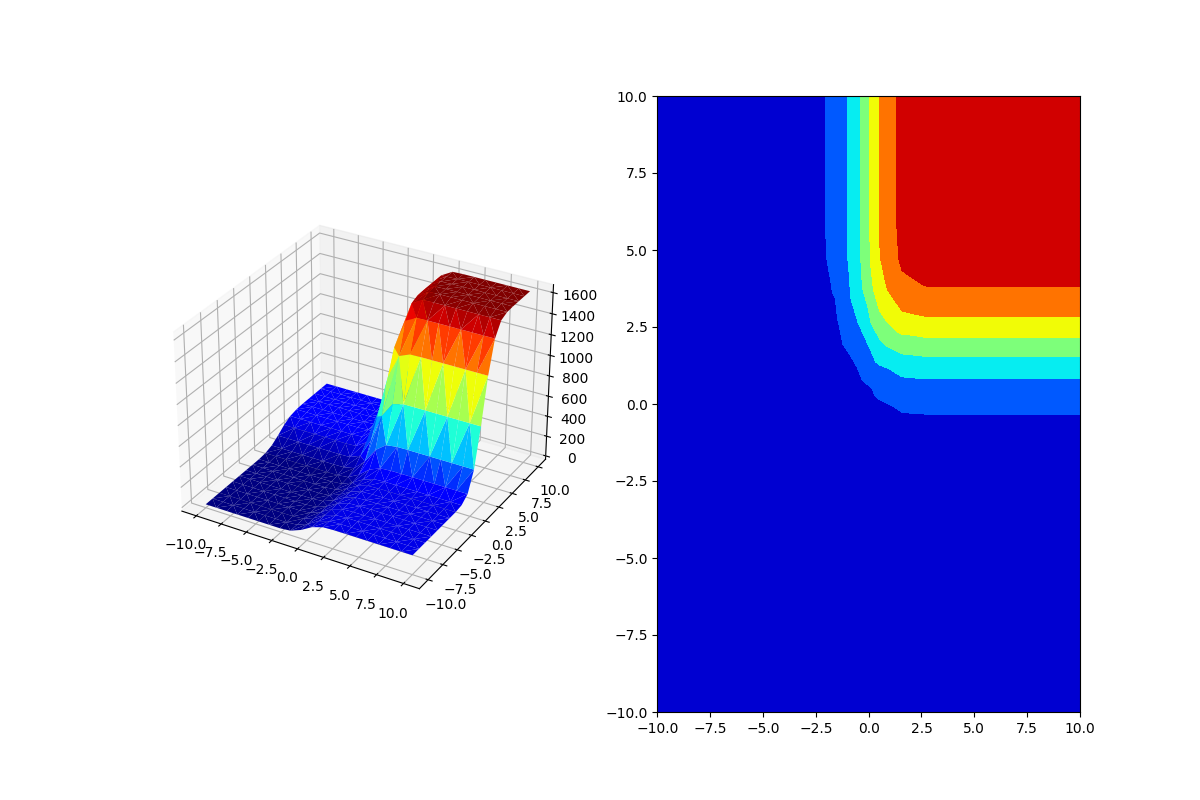

In [9]:
ALFA = 0.01
BETA = 0.95


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121,projection="3d")
z = CopulaFerche(N1,N2)
print(len(z))

polyc = ax.plot_trisurf(x, y, z,cmap=cm.jet)

ax1 = fig.add_subplot(122)
ax1.tricontourf(x, y, z, zdir='z',cmap=cm.jet)

plt.show()

<a list of 27 text.Text objects>

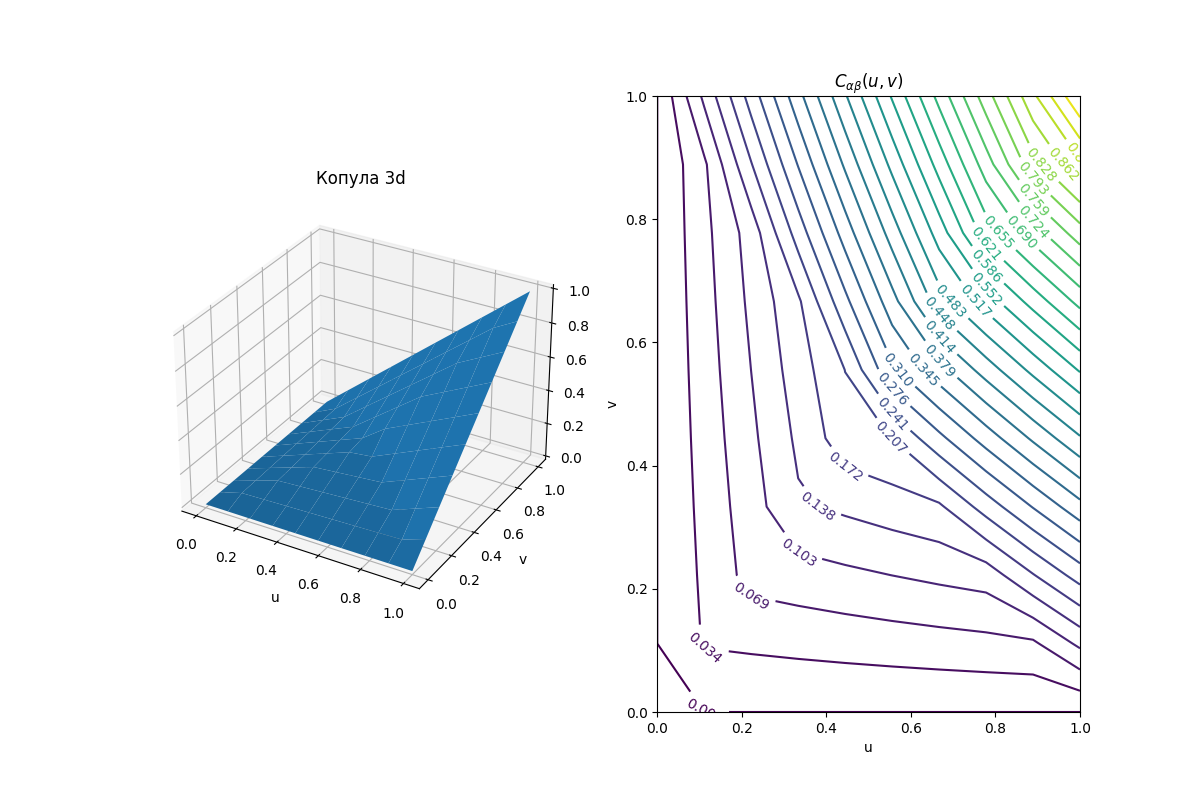

In [10]:
%matplotlib widget

ALFA = 0.3
BETA = 0.4


u,v = np.meshgrid(np.linspace(0,1,10),np.linspace(0,1,10))
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121,projection="3d")
z = CopulaFerche(u,v)
ax.plot_surface(u, v, z)
ax.set_title("Копула 3d")
ax.set_ylabel(r"v")
ax.set_xlabel(r"u")

ax1 = fig.add_subplot(122)
CS = ax1.contour(u,v,z,np.linspace(0,1,30))
ax1.set_title(r"$C_{\alpha\beta}(u,v)$")
ax1.set_xlabel(r"u")
ax1.set_ylabel(r"v")
ax1.clabel(CS,CS.levels)

In [23]:
def Copula_on_sum_int(*args):
    @np.vectorize
    def M(x,y):
        return min(x,y)
    
    @np.vectorize
    def C_ret(u,v):
        for i in range(0,len(args),3):
            a,b,C  = args[i], args[i+1], args[i+2]
            if a<u<b and a<v<b: 
                return a + (b-a)*C((u-a)/(b-a),(v-a)/(b-a))
        return M(u,v)
    return C_ret


In [26]:
N = 50
I = np.linspace(0,1,N)
u,v = np.meshgrid(I,I)

Copula_of_sum = Copula_on_sum_int(0,1/3,P, 2/3,5/6, W, 5/1,1, P)
z = Copula_of_sum(u,v)

zeros = np.zeros_like(I)
zu = Copula_of_sum(I,I)

<a list of 46 text.Text objects>

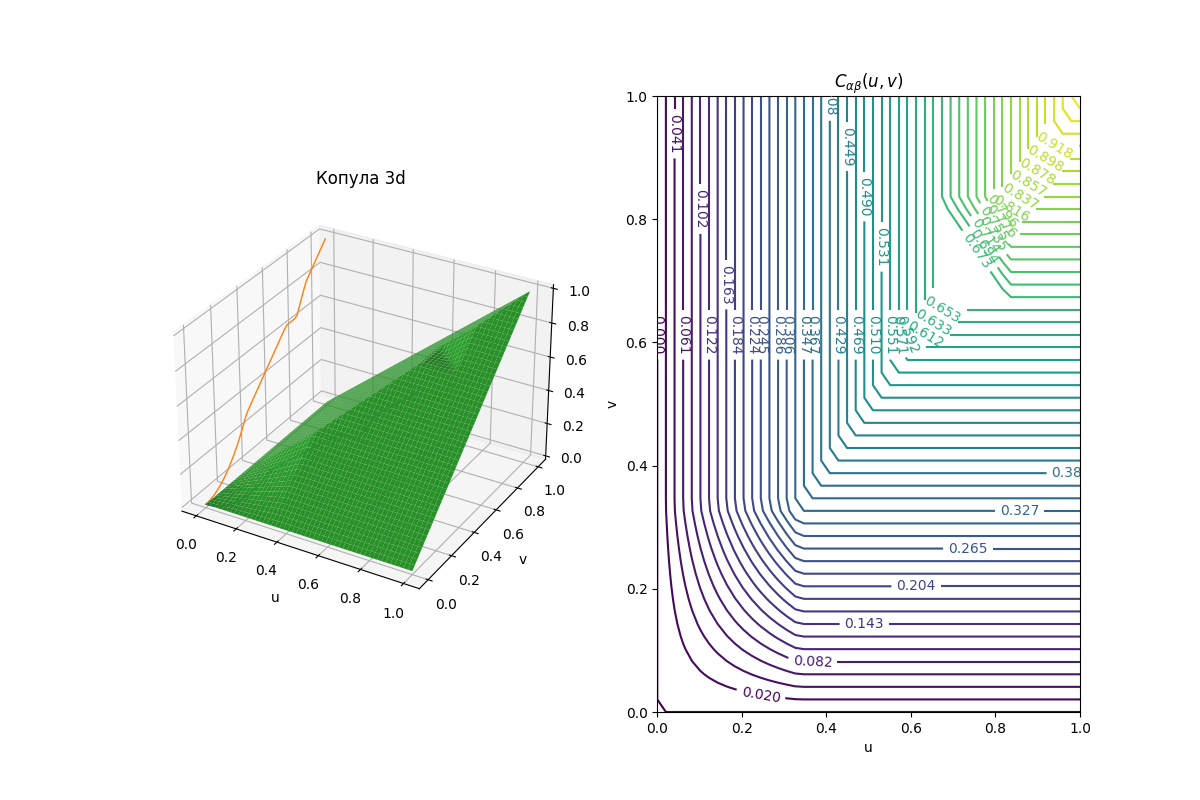

In [27]:
%matplotlib widget


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121,projection="3d")

ax.plot(I,zeros, zu, linewidth = 1)
ax.plot(zeros, I, zu, linewidth = 1)

ax.plot_surface(u, v, z)
ax.set_title("Копула 3d")
ax.set_ylabel(r"v")
ax.set_xlabel(r"u")

ax1 = fig.add_subplot(122)
CS = ax1.contour(u,v,z,np.linspace(0,1,N))
ax1.set_title(r"$C_{\alpha\beta}(u,v)$")
ax1.set_xlabel(r"u")
ax1.set_ylabel(r"v")
ax1.clabel(CS,CS.levels)

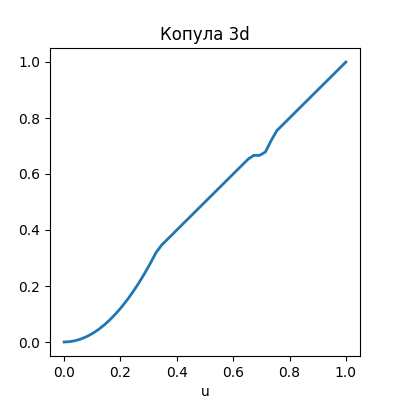

In [14]:
%matplotlib widget


fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

ax.plot(I, zu, linewidth = 2)

ax.set_title("Копула 3d")
ax.set_xlabel(r"u")

plt.show()